**Name:** <span style="color:red">Adria Navarro & Sergi Ocana</span>

# SYSTEMS AND NETWORK BIOLOGY - PRACTICAL 4

# Positive feedback


---

To submit your report, answer the questions below and save the *notebook* clicking on `File > Download as > iPython Notebook` in the menu at the top of the page. **Rename the notebook file** to ''`practicalN_name1_name2.ipynb`'', where `N` is the number of the practical, and `name1` and `name2` are the first surnames of the two team members (only one name if the report is sent individually). Finally, **submit the resulting file through the *Aula ESCI***.

Remember to label the axes in all the plots.

*IMPORTANT REMINDER: Before the final submission, remember to **reset the kernel** and re-run the whole notebook again to check that it works.*

---

The objective of this practical is to explore the behaviour of a system with a positive feedback motif. In particular, we will use numerical integration of an ordinary differential equation model to analyze the behavior of a phosphorylation/dephosphorylation cycle as the kinase concentration (acting as input signal) is cycled from a low to a high level and back.

Consider the phosphorylation/dephosphorylation cycle shown in the figure
below, in which phosphorylation is induced by both a stimulus signal
$S$ and by the phosphorylated protein itself, in the form of a positive
feedback loop. Assuming that the latter process is cooperative, the
model of this system can be written as:

<img style="margin: 20px; float: right" src="http://dsb.upf.edu/biocomp/figs/irrevers.png" width="15%"/>

$$\frac{dA_p}{dt}=k_p SA+\beta\frac{A_p^n}{K^n+A_p^n}-k_dA_p$$

where
$k_p$ is the activation (phosphorylation) rate, $k_d$ is the
inactivation (dephosphorylation) rate, $A$ is the concentration of the
unphosphorylated protein, and $A_p$ is the concentration of the
phosphorylated protein.
We will assume that the total protein concentration, $A_T=A+A_p$, is
constant. We will consider the following parameter values: $K=50$,
$A_T=100$, $k_d=0.11$, $\beta=10$, $k_p=0.1$, and $n=4$.

In [1]:
# Write your code here
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

A_T = 100  # Total protein concentration
K = 50     # Cooperativity constant
k_p = 0.1  # Phosphorylation rate constant
k_d = 0.11 # Dephosphorylation rate constant
beta = 10  # Feedback strength
n = 4      # Hill coefficient

# Define the ODE
def phosphorylation_cycle(A_p, t, S):
    A = A_T - A_p  # Concentration of unphosphorylated protein
    dA_p_dt = k_p * S * A + beta * (A_p**n / (K**n + A_p**n)) - k_d * A_p
    return dA_p_dt


t = np.linspace(0, 100, 1000)

S_values_up = np.linspace(0, 1, 100)  # From 0 to 1 (increasing)
S_values_down = np.linspace(1, 0, 100)  # From 1 to 0 (decreasing)
S_values = np.concatenate((S_values_up, S_values_down))  # Combine


A_p0 = 0


A_p_values = []

for S in S_values:
    A_p_t = odeint(phosphorylation_cycle, A_p0, t, args=(S,))
    A_p_values.append(A_p_t[-1][0])  
    A_p0 = A_p_t[-1][0]  

'''
plt.figure(figsize=(8, 6))
plt.plot(S_values, A_p_values, label='A_p (Phosphorylated protein)', color='b')
plt.xlabel('Signal S')
plt.ylabel('Concentration of A_p')
plt.title('Phosphorylation/Dephosphorylation Cycle with Positive Feedback')
plt.legend()
plt.grid(True)
plt.show()
'''

"\nplt.figure(figsize=(8, 6))\nplt.plot(S_values, A_p_values, label='A_p (Phosphorylated protein)', color='b')\nplt.xlabel('Signal S')\nplt.ylabel('Concentration of A_p')\nplt.title('Phosphorylation/Dephosphorylation Cycle with Positive Feedback')\nplt.legend()\nplt.grid(True)\nplt.show()\n"

First, integrate numerically, up to $t=100$, the differential equation
above for a low (basal) stimulus level, such as $S=0.01$, assuming
that initially the protein is completely unphosphorylated.

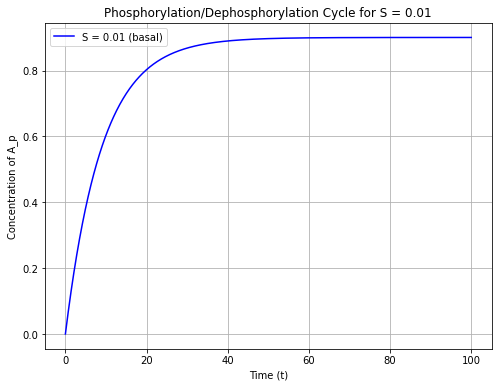

In [2]:
# Write your code here
A_p0 = 0  # Initial concentration
S_basal = 0.01  
# Time range 
t_basal = np.linspace(0, 100, 1000)

# Integrate the ODE 
A_p_basal = odeint(phosphorylation_cycle, A_p0, t_basal, args=(S_basal,))

plt.figure(figsize=(8, 6))
plt.plot(t_basal, A_p_basal, label=f'S = {S_basal} (basal)', color='b')
plt.xlabel('Time (t)')
plt.ylabel('Concentration of A_p')
plt.title(f'Phosphorylation/Dephosphorylation Cycle for S = {S_basal}')
plt.legend()
plt.grid(True)
plt.show()


---

<span style="color:red">The protein is initially totally unphosphorylated. A_pA p gradually rises with time, but because of the poor stimulus, the total phosphorylation level stays low. When the phosphorylation and dephosphorylation rates equalize, the system reaches a stable state that indicates little activity at rest.</span>

---

Nest, starting from the stationary situation obtained in the previous
case, study the effect of suddenly applying a large stimulus signal,
so that $S$ suddenly jumps to a high level, such as $S=1$.

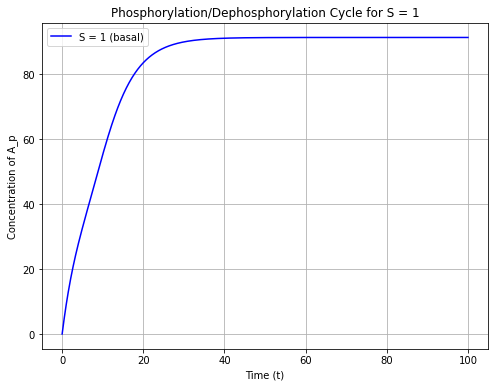

In [3]:
# Write your code here
A_p0 = 0  # Initial concentration 
S_basal = 1  

# Time range 
t_basal = np.linspace(0, 100, 1000)

# Integrate the ODE 
A_p_basal = odeint(phosphorylation_cycle, A_p0, t_basal, args=(S_basal,))

plt.figure(figsize=(8, 6))
plt.plot(t_basal, A_p_basal, label=f'S = {S_basal} (basal)', color='b')
plt.xlabel('Time (t)')
plt.ylabel('Concentration of A_p')
plt.title(f'Phosphorylation/Dephosphorylation Cycle for S = {S_basal}')
plt.legend()
plt.grid(True)
plt.show()

---

<span style="color:red">We get the same result of the curve as before, firstly a rapid increase but after that as time passes it stabilizes. </span>

---

Next, starting from the latest stationary situation, integrate
the equations again for $S=0.01$. Does the system go back to its
original state?

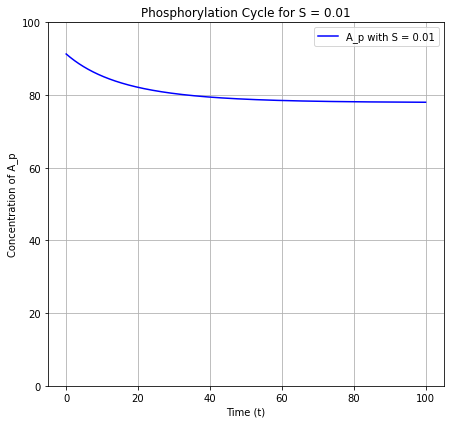

In [4]:

def phosphorylation_cycle(A_p, t, S):
    A = A_T - A_p 
    dA_p_dt = k_p * S * A + beta * (A_p**n / (K**n + A_p**n)) - k_d * A_p
    return dA_p_dt


S_high = 1 
A_p0_high = 0  

# Put the ODE for high stimulus
A_p_high = odeint(phosphorylation_cycle, A_p0_high, t, args=(S_high,))

# Get the final concentration of A_p after the high stimulus
final_A_p_high = A_p_high[-1][0]

S_low = 0.01 

A_p0_low = final_A_p_high

# Integrate the ODE for low stimulus
A_p_low = odeint(phosphorylation_cycle, A_p0_low, t, args=(S_low,))

plt.figure(figsize=(12, 6))

# Plot for S = 0.01
plt.subplot(1, 2, 2)
plt.plot(t, A_p_low, label='A_p with S = 0.01', color='b')
plt.title('Phosphorylation Cycle for S = 0.01')
plt.xlabel('Time (t)')
plt.ylabel('Concentration of A_p')
plt.ylim(0, 100)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


---

<span style="color:red">The plot show us  that even after reducing the stimulus, the protein remains partially activated for a considerable time .</span>

---

Finally, continue further to $S=0$, thus eliminating the stimulus
completely. Does the system now go back to its original
state? 

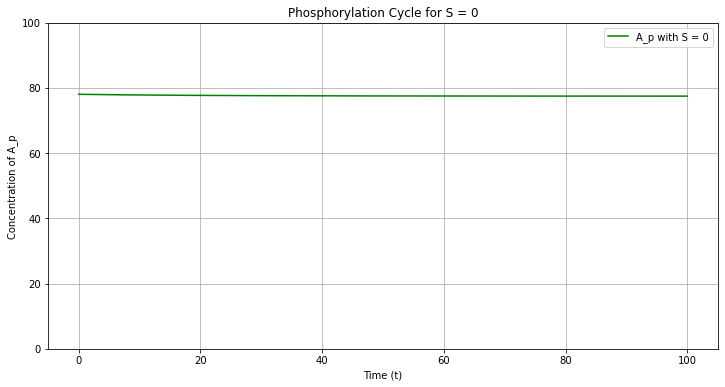

In [7]:

S_zero = 0  

# Use the last value of A_p from the previous integration as the starting point
A_p0_zero = A_p_low[-1][0]

A_p_zero = odeint(phosphorylation_cycle, A_p0_zero, t, args=(S_zero,))

# Plot the result
plt.figure(figsize=(12, 6))
plt.plot(t, A_p_zero, label='A_p with S = 0', color='g')
plt.title('Phosphorylation Cycle for S = 0')
plt.xlabel('Time (t)')
plt.ylabel('Concentration of A_p')
plt.ylim(0, 100)  # Set y-axis limits
plt.legend()
plt.grid(True)
plt.show()


---

<span style="color:red"> The system retains some level of phosphorylation even after the removal of the stimulus, as we can see that Ap does not go to 0.</span>

---

Now we will manually compute a bifurcation diagram of the system. 
In order to do this, choose a range of S values from 0 to 1. Start for S=0 considering that the protein is unphosphorylated at the beginning. Then, for each S value do a simulation starting each integration at the previous steady state, and save the new steady state value. Plot the results in a graph where the x axis is S, and the y axis is the steady state reached (from each simulation). Then do the same but in reverse order (starting from high S) and plot the results in a different color.

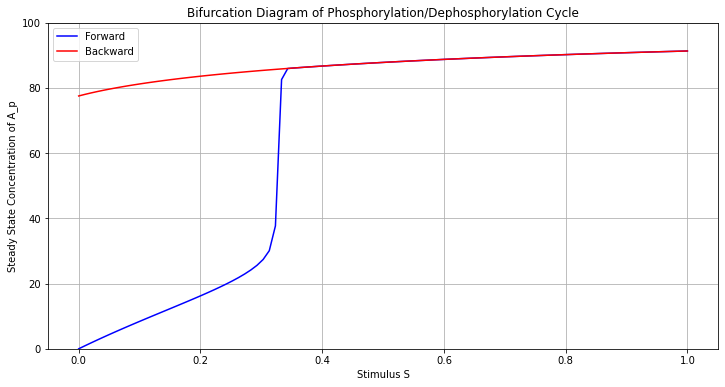

In [5]:
# Write your code here
def phosphorylation_cycle(A_p, t, S):
    A = A_T - A_p  # Concentration of unphosphorylated protein
    dA_p_dt = k_p * S * A + beta * (A_p**n / (K**n + A_p**n)) - k_d * A_p
    return dA_p_dt

S_values = np.linspace(0, 1, 100)
steady_states = []
steady_states_reverse = []

t = np.linspace(0, 50, 500)

A_p0 = 0  # Start with unphosphorylated protein for S = 0
for S in S_values:
    A_p = odeint(phosphorylation_cycle, A_p0, t, args=(S,))
    steady_states.append(A_p[-1][0])  
    A_p0 = steady_states[-1]  


A_p0_reverse = 100  
for S in reversed(S_values):
    A_p = odeint(phosphorylation_cycle, A_p0_reverse, t, args=(S,))
    steady_states_reverse.append(A_p[-1][0]) 
    A_p0_reverse = steady_states_reverse[-1]  

plt.figure(figsize=(12, 6))
plt.plot(S_values, steady_states, label='Forward', color='b')
plt.plot(S_values, steady_states_reverse[::-1], label='Backward', color='r')
plt.xlabel('Stimulus S')
plt.ylabel('Steady State Concentration of A_p')
plt.title('Bifurcation Diagram of Phosphorylation/Dephosphorylation Cycle')
plt.legend()
plt.grid(True)
plt.ylim(0, 100)  
plt.show()

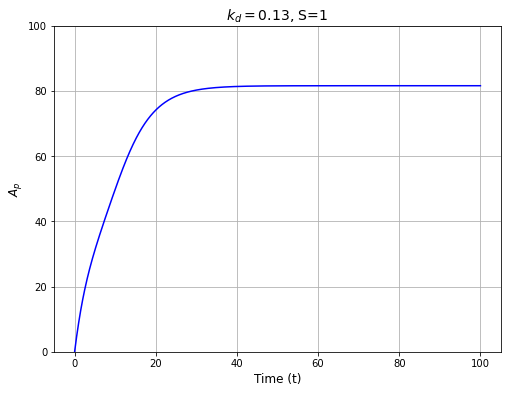

In [16]:

A_T = 100   
K = 50      
k_p = 0.1   
k_d = 0.13  
beta = 10   
n = 4       

def phosphorylation_cycle(A_p, t, S):
    A = A_T - A_p  # Concentration of unphosphorylated protein
    dA_p_dt = k_p * S * A + beta * (A_p**n / (K**n + A_p**n)) - k_d * A_p
    return dA_p_dt


A_p0 = 0     
S_basal = 1  


t = np.linspace(0, 100, 1000)  

A_p_basal = odeint(phosphorylation_cycle, A_p0, t, args=(S_basal,))

plt.figure(figsize=(8, 6))
plt.plot(t, A_p_basal, label=f'$k_d=0.13$, S={S_basal}', color='b')
plt.xlabel('Time (t)', fontsize=12)
plt.ylabel('$A_p$', fontsize=12)
plt.title(f'$k_d=0.13$, S={S_basal}', fontsize=14)
plt.ylim(0, 100)  # Set y-axis limit to 100
plt.grid(True)
plt.show()


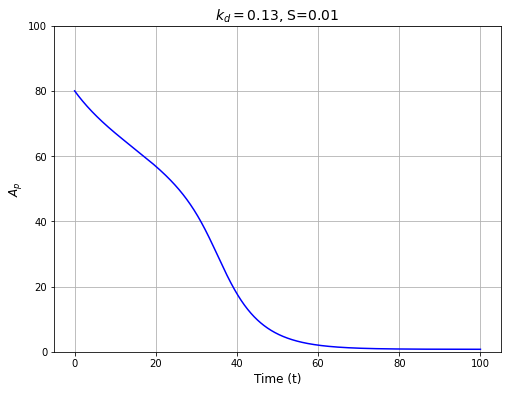

In [17]:
A_T = 100   
K = 50      
k_p = 0.1   
k_d = 0.13  
beta = 10   
n = 4       

def phosphorylation_cycle(A_p, t, S):
    A = A_T - A_p  # Concentration of unphosphorylated protein
    dA_p_dt = k_p * S * A + beta * (A_p**n / (K**n + A_p**n)) - k_d * A_p
    return dA_p_dt

A_p0 = 80
S_basal = 0.01  


t = np.linspace(0, 100, 1000)  


A_p_basal = odeint(phosphorylation_cycle, A_p0, t, args=(S_basal,))


plt.figure(figsize=(8, 6))
plt.plot(t, A_p_basal, label=f'$k_d=0.13$, S={S_basal}', color='b')
plt.xlabel('Time (t)', fontsize=12)
plt.ylabel('$A_p$', fontsize=12)
plt.title(f'$k_d=0.13$, S={S_basal}', fontsize=14)
plt.ylim(0, 100)  # Set y-axis limit to 100
plt.grid(True)
plt.show()

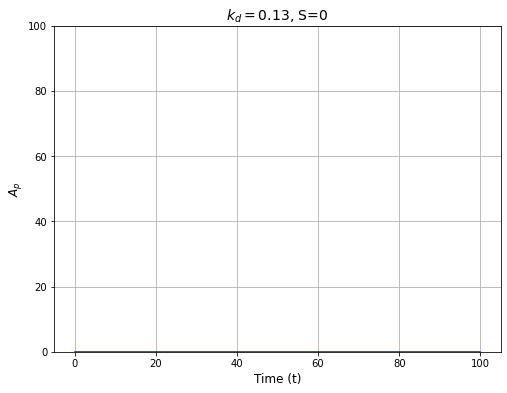

In [23]:
A_T = 100   
K = 50      
k_p = 0.1   
k_d = 0.13  
beta = 10   
n = 4       

def phosphorylation_cycle(A_p, t, S):
    A = A_T - A_p  # Concentration of unphosphorylated protein
    dA_p_dt = k_p * S * A + beta * (A_p**n / (K**n + A_p**n)) - k_d * A_p
    return dA_p_dt

A_p0 = 0
S_basal = 0


t = np.linspace(0, 100, 1000)  


A_p_basal = odeint(phosphorylation_cycle, A_p0, t, args=(S_basal,))


plt.figure(figsize=(8, 6))
plt.plot(t, A_p_basal, label=f'$k_d=0.13$, S={S_basal}', color='b')
plt.xlabel('Time (t)', fontsize=12)
plt.ylabel('$A_p$', fontsize=12)
plt.title(f'$k_d=0.13$, S={S_basal}', fontsize=14)
plt.ylim(0, 100)  # Set y-axis limit to 100
plt.grid(True)
plt.show()

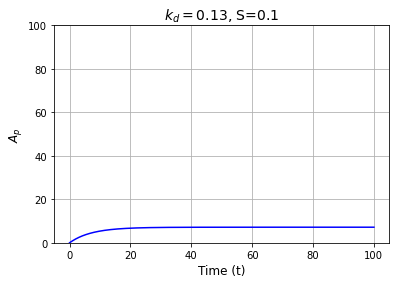

In [12]:

A_T = 100   
K = 50      
k_p = 0.1   
k_d = 0.13  
beta = 10   
n = 4       

def phosphorylation_cycle(A_p, t, S):
    A = A_T - A_p  # Concentration of unphosphorylated protein
    dA_p_dt = k_p * S * A + beta * (A_p**n / (K**n + A_p**n)) - k_d * A_p
    return dA_p_dt


A_p0 = 0     
S_basal = 0.1  


t = np.linspace(0, 100, 1000)  

A_p_basal = odeint(phosphorylation_cycle, A_p0, t, args=(S_basal,))

plt.figure(figsize=(6, 4))
plt.plot(t, A_p_basal, label=f'$k_d=0.13$, S={S_basal}', color='b')
plt.xlabel('Time (t)', fontsize=12)
plt.ylabel('$A_p$', fontsize=12)
plt.title(f'$k_d=0.13$, S={S_basal}', fontsize=14)
plt.ylim(0, 100)  # Set y-axis limit to 100
plt.grid(True)
plt.show()


---

<span style="color:red">Comment your result here</span>

---

Finally, repeat the analysis above for $k_d=0.13$. First, integrate for fixed values of $S$ (increasing first from $S=0.01$ to $S=1$, and then decreasing back to $S=0.01$ and $S=0$), starting in each case from the previous steady state. Comment on the differences with respect to the case $k_d=0.11$.

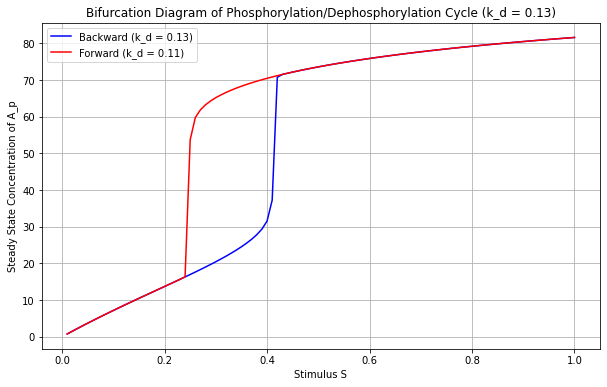

In [7]:
# Write your code here
A_T = 100  
K = 50    
k_p = 0.1  
k_d = 0.13 
beta = 10  
n = 4      


def phosphorylation_cycle(A_p, t, S):
    A = A_T - A_p  # Concentration of unphosphorylated protein
    dA_p_dt = k_p * S * A + beta * (A_p**n / (K**n + A_p**n)) - k_d * A_p
    return dA_p_dt

#
t = np.linspace(0, 100, 1000)


steady_states_increasing = []
steady_states_decreasing = []

# Increasing S from 0.01 to 1
S_values_increasing = np.linspace(0.01, 1, 100)
A_p0 = 0  # Start with unphosphorylated protein

for S in S_values_increasing:
    A_p_t = odeint(phosphorylation_cycle, A_p0, t, args=(S,))
    A_p0 = A_p_t[-1][0]  # Update for the next S value
    steady_states_increasing.append(A_p0)

# Decreasing S from 1 to 0.01
S_values_decreasing = np.linspace(1, 0.01, 100)
for S in S_values_decreasing:
    A_p_t = odeint(phosphorylation_cycle, A_p0, t, args=(S,))
    A_p0 = A_p_t[-1][0]  # Update for the next S value
    steady_states_decreasing.append(A_p0)

plt.figure(figsize=(10, 6))
plt.plot(S_values_increasing, steady_states_increasing, label='Backward (k_d = 0.13)', color='blue')
plt.plot(S_values_decreasing, steady_states_decreasing, label='Forward (k_d = 0.13)', color='red')
plt.xlabel('Stimulus S')
plt.ylabel('Steady State Concentration of A_p')
plt.title('Bifurcation Diagram of Phosphorylation/Dephosphorylation Cycle (k_d = 0.13)')
plt.legend()
plt.grid(True)
plt.show()

---

<span style="color:red">Comment your result here</span>

---

Finally, calculate numerically the bifurcation diagram for $k_d=0.13$ and compare it again with the case $k_d=0.11$.

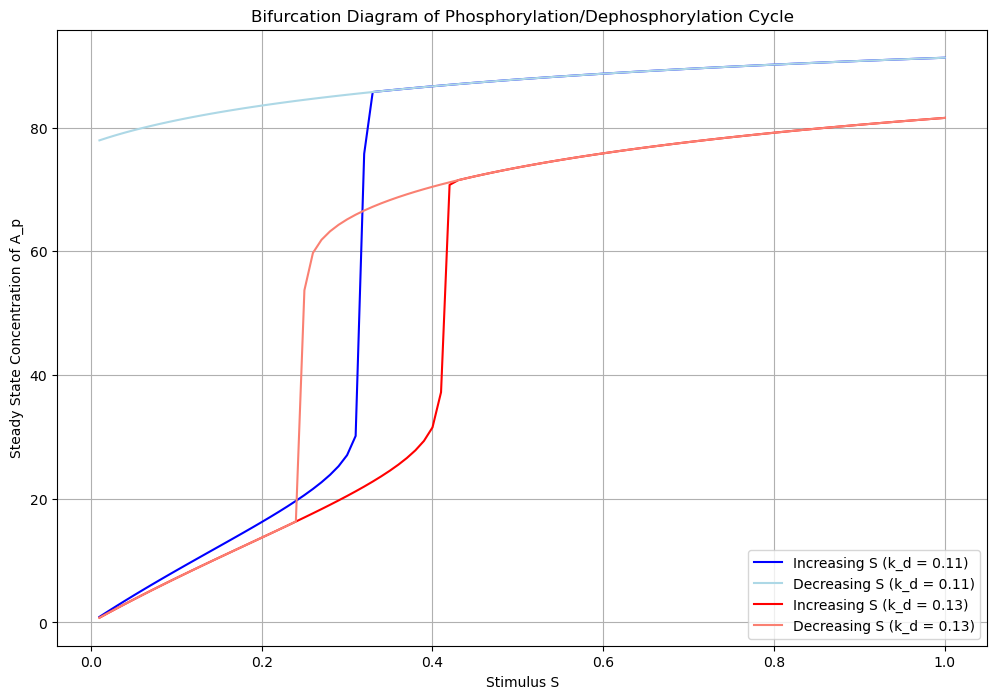

In [13]:
# Write your code here
def phosphorylation_cycle(A_p, t, S, k_d):
    A_T = 100  
    K = 50     
    k_p = 0.1 
    beta = 10  
    n = 4      
    A = A_T - A_p  
    dA_p_dt = k_p * S * A + beta * (A_p**n / (K**n + A_p**n)) - k_d * A_p
    return dA_p_dt

# Function to run bifurcation analysis
def bifurcation_analysis(k_d):
    steady_states_increasing = []
    steady_states_decreasing = []
    
    
    t = np.linspace(0, 100, 1000)

    # S from 0.01 to 1
    S_values_increasing = np.linspace(0.01, 1, 100)
    A_p0 = 0  

    for S in S_values_increasing:
        A_p_t = odeint(phosphorylation_cycle, A_p0, t, args=(S, k_d))
        A_p0 = A_p_t[-1][0]  
        steady_states_increasing.append(A_p0)

    #S from 1 to 0.01 (decrease)
    S_values_decreasing = np.linspace(1, 0.01, 100)
    for S in S_values_decreasing:
        A_p_t = odeint(phosphorylation_cycle, A_p0, t, args=(S, k_d))
        A_p0 = A_p_t[-1][0]  
        steady_states_decreasing.append(A_p0)

    return S_values_increasing, steady_states_increasing, S_values_decreasing, steady_states_decreasing

S_inc_kd_11, steady_inc_kd_11, S_dec_kd_11, steady_dec_kd_11 = bifurcation_analysis(0.11)
S_inc_kd_13, steady_inc_kd_13, S_dec_kd_13, steady_dec_kd_13 = bifurcation_analysis(0.13)

plt.figure(figsize=(12, 8))
plt.plot(S_inc_kd_11, steady_inc_kd_11, label='Increasing S (k_d = 0.11)', color='blue')
plt.plot(S_dec_kd_11, steady_dec_kd_11, label='Decreasing S (k_d = 0.11)', color='lightblue')
plt.plot(S_inc_kd_13, steady_inc_kd_13, label='Increasing S (k_d = 0.13)', color='red')
plt.plot(S_dec_kd_13, steady_dec_kd_13, label='Decreasing S (k_d = 0.13)', color='salmon')
plt.xlabel('Stimulus S')
plt.ylabel('Steady State Concentration of A_p')
plt.title('Bifurcation Diagram of Phosphorylation/Dephosphorylation Cycle')
plt.legend()
plt.grid(True)
plt.show()

---

<span style="color:red">Comment your result here</span>

---